# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single dataset

mouse_study = pd.merge(study_results, mouse_metadata, on=['Mouse ID'],how='left')


# Display the data table for preview

mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [93]:
# Checking the number of mice.
mice_id = mouse_study['Mouse ID'].unique()
mice_count = len(mice_id)
mice_count

249

In [94]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRows = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])] 
duplicateRows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [95]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID

mouse_study_clean = mouse_study.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

mouse_study_clean.count()

mice_count = mouse_study_clean['Mouse ID'].unique()
mice_count = len(mice_count)
mice_count

249

## Summary Statistics

In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mouse_mean = mouse_study_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mouse_median = mouse_study_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
mouse_variance = mouse_study_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
mouse_std_dev = mouse_study_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
mouse_sem = mouse_study_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

mouse_summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mouse_mean,
    'Median Tumor Volume': mouse_median,
    'Tumor Volume Variance': mouse_variance,
    'Tumor Volume Std. Dev.': mouse_std_dev,
    'Tumor Volume Std. Err.': mouse_sem
})

# Assemble the resulting series into a single summary DataFrame.

mouse_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts


Text(0, 0.5, 'Number of Mice Tested')

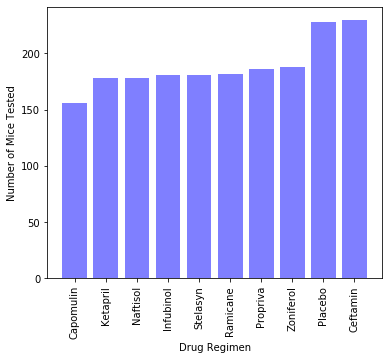

In [97]:
# Generate a bar plot with plt.bar showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
y_axis = mouse_study_clean.groupby('Drug Regimen').count()['Timepoint']
x_axis = mouse_study_clean['Drug Regimen'].unique()



plt.figure(figsize=(6,5))
plt.bar(x_axis, sorted(y_axis), color='b', alpha=0.5, align="center")
plt.xticks(x_axis, rotation="vertical")

# Set labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

[Text(0, 0.5, 'Number of Mice Tested'), Text(0.5, 0, 'Drug Regimen')]

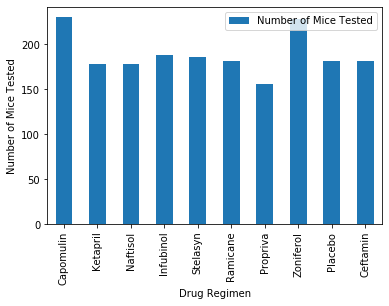

In [98]:
# Generate a bar plot with plt.bar showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mod_mouse_study = pd.DataFrame({
    'Drug Regimen': x_axis,
    'Number of Mice Tested': y_axis
})


mod_mouse_study.plot(x='Drug Regimen', y='Number of Mice Tested', kind ="bar").set(xlabel="Drug Regimen", ylabel="Number of Mice Tested")


In [99]:
#Grouping mice genders
mouse_unique = mouse_study.drop_duplicates(subset=['Mouse ID'])
mice_gender = mouse_unique.groupby('Sex').count()['Mouse ID']
mice_gender

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

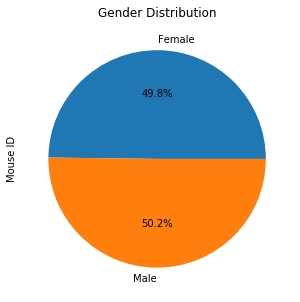

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# plot the pie chart
mice_gender.plot.pie(y='Count', figsize=(5, 5), autopct='%1.1f%%')

# add the title
plt.title("Gender Distribution")

# show the plot
plt.show()


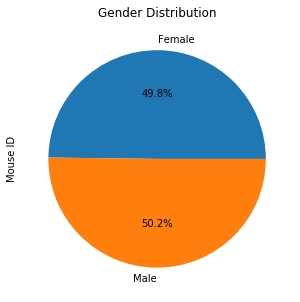

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# plot the pie chart
mice_gender.plot.pie(y='Count', figsize=(5, 5), autopct='%1.1f%%')

# add the title
plt.title("Gender Distribution")

# show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

condition = (mouse_study_clean['Drug Regimen'] == 'Capomulin') | (mouse_study_clean['Drug Regimen'] == 'Ramicane') | (mouse_study_clean['Drug Regimen'] == 'Infubinol') | (mouse_study_clean['Drug Regimen'] == 'Ceftamin')
filtered = mouse_study_clean.loc[condition]

filtered_rev = filtered[[ 'Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

tumor_vol_sum = filtered_rev.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].sum()

filt_drug_list = pd.DataFrame(tumor_vol_sum)

filt_drug_list = filt_drug_list.reset_index()

filt_drug_list





,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,563.127077
1,a251,Infubinol,552.370946
2,a275,Ceftamin,527.709651
3,a411,Ramicane,407.013854
4,a444,Ramicane,430.600524
...,...,...,...
95,y769,Ceftamin,562.908873
96,y793,Capomulin,385.068292
97,y865,Ceftamin,549.985586
98,z578,Ramicane,384.115100


In [103]:
# Start by getting the last (greatest) timepoint for each mouse

max_tp_per_mouse = mouse_study_clean.groupby('Mouse ID').max()['Timepoint']
max_tp_per_mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_max_tp = pd.merge(max_tp_per_mouse, mouse_study_clean, on=['Mouse ID','Timepoint'],how='left')
merged_max_tp_rev = merged_max_tp[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
merged_max_tp_rev



,Mouse ID,Timepoint,Tumor Volume (mm3)
0,a203,45,67.973419
1,a251,45,65.525743
2,a262,45,70.717621
3,a275,45,62.999356
4,a366,30,63.440686
...,...,...,...
244,z435,10,48.710661
245,z578,45,30.638696
246,z581,45,62.754451
247,z795,45,65.741070


In [104]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

for drug in drug_list:
    # add subset 
    drug_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == drug]
    
    # Get the tumor volume data for the drug
    tumor_vol = drug_data['Tumor Volume (mm3)']
    
    #Append the tumor volume data to the list for plotting
    tumor_vol_data.append(tumor_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    

    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

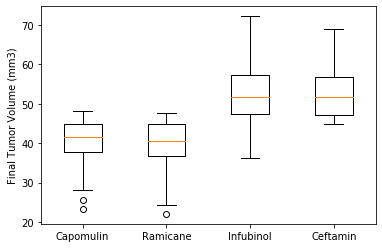

In [105]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Set up the figure and axes
fig, ax = plt.subplots()

# Generate the box plot
ax.boxplot(tumor_vol_data)

# Set the x-axis tick labels
ax.set_xticklabels(drug_list)

# Set the y-axis label
ax.set_ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()



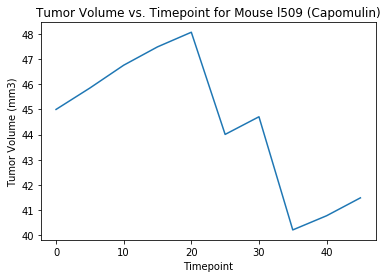

In [106]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Filter the data to include only mice treated with Capomulin
capomulin_data = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Capomulin']

# Choose a mouse to plot
mouse_id = 'l509'
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_id]

# Create a line plot of tumor volume vs. time point
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Set the plot title and axis labels
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()


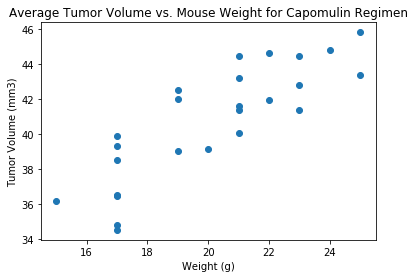

In [107]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Calculate the average tumor volume and mouse weight for each mouse
avg_capomulin_data = capomulin_data.groupby('Mouse ID').mean()[['Weight (g)', 'Tumor Volume (mm3)']]

# Generate a scatter plot of average tumor volume vs. mouse weight
plt.scatter(avg_capomulin_data['Weight (g)'], avg_capomulin_data['Tumor Volume (mm3)'])

# Add chart labels and titles
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


The correlation between mouse weight and average tumor volume is 0.53


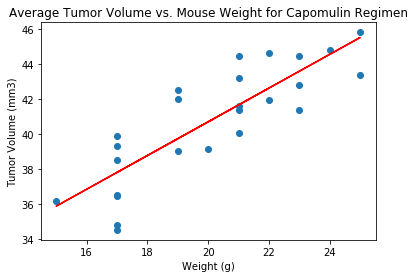

In [114]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")


plt.scatter(avg_capomulin_data['Weight (g)'], avg_capomulin_data['Tumor Volume (mm3)'])

# Add chart labels and titles
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


# Plot the scatter plot and linear regression model

plt.plot(capomulin_data["Weight (g)"], regress_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()